# Laboratorio 2.1: Clasificación

Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Sánchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

Octubre 2021

## ============= Declaración de compromiso ético =============

Nosotros, ****José Luis Cádiz, Maximiliano Jorquera****, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. El formato de entrega para esta actividad es un archivo html. **Genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Estructura del laboratorio

Este laboratorio está conformado por preguntas teóricas de temas vistos en clases y preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y análisis. La parte práctica se divide en: 

1. Explorar los datos.
2. Entrenar un clasificador de 3 maneras:
    - Entrenando/Testeando con los mismos datos,
    - Dividiendo el dataset en una parte para entrenar y otra para testear, y
    - Usando cross-validation. 

# Teoría

#### 1. Un consultor en minería de datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar uno que tenga cero error de entrenamiento. Comente la estrategia del consultor y proponga una estrategia alternativa.

**Respuesta: La estrategia del consultor no es buena, ya que lo que se esta haciendo es hacer que el modelo memorice los datos de entrenamiento, lo cual dicho con un lenguaje más técnico, el modelo se esta sobre-entrenando (overfitting) y pierde la capacidad de generalizar. Además para medir la real capacidad predicitiva de un modelo, este se debe evaluar sobre un conjunto distinto al de entrenamiento, ya sea conjunto de validación o de prueba.**

#### 2. El mismo consultor siempre usa la misma métrica para evaluar un modelo: accuracy. Comente la estrategia del consultor y proponga una estrategia alternativa.

**Respuesta: No es recomendable en general evaluar un modelo solo con una métrica y menos con Accuracy, ya que si es que las clases del dataset estan desbalanceadas, la métrica podría reflejar un buen desempeño siendo que no lo tiene, si es que el clasificador se inclina a clasificar todo como la clase mayoritaria.**

# Parte 1: Explorar los datos

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Ejecutaremos la siguiente línea de código para importar la librería que nos permitirá cargarlo.

In [152]:
from sklearn.datasets import load_wine

## Pregunta 1.1

Cargue los datos e indique lo siguiente:
* Tamaño del dataset (cantidad de instancias y atributos). 
* ¿Cuántas clases hay y cuáles son sus nombres?
* ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

In [153]:
import numpy as np
import pandas as pd
x=load_wine().data

y=load_wine().target


In [154]:
# Tamaño
x.shape

(178, 13)

**El dataset tiene 178 instancias y 13 atributos.**

In [155]:
unique, counts = np.unique(y, return_counts=True)
print(len(unique))
print(unique,counts)

3
[0 1 2] [59 71 48]


**Existen 3 clases, los nombres son 0, 1 y 2, de cada clase hay 59, 71 y 48 instancias respectivamente.**

In [156]:
# A continuación se muestran los nombres de las carácteristicas
print(load_wine().feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Pregunta 1.2

Explique:
- ¿Qué hacen las siguientes líneas de código?
- ¿Qué nos muestra este gráfico? 
- ¿Cuáles son las principales observaciones que puede obtener sobre los datos a partir de los gráficos?

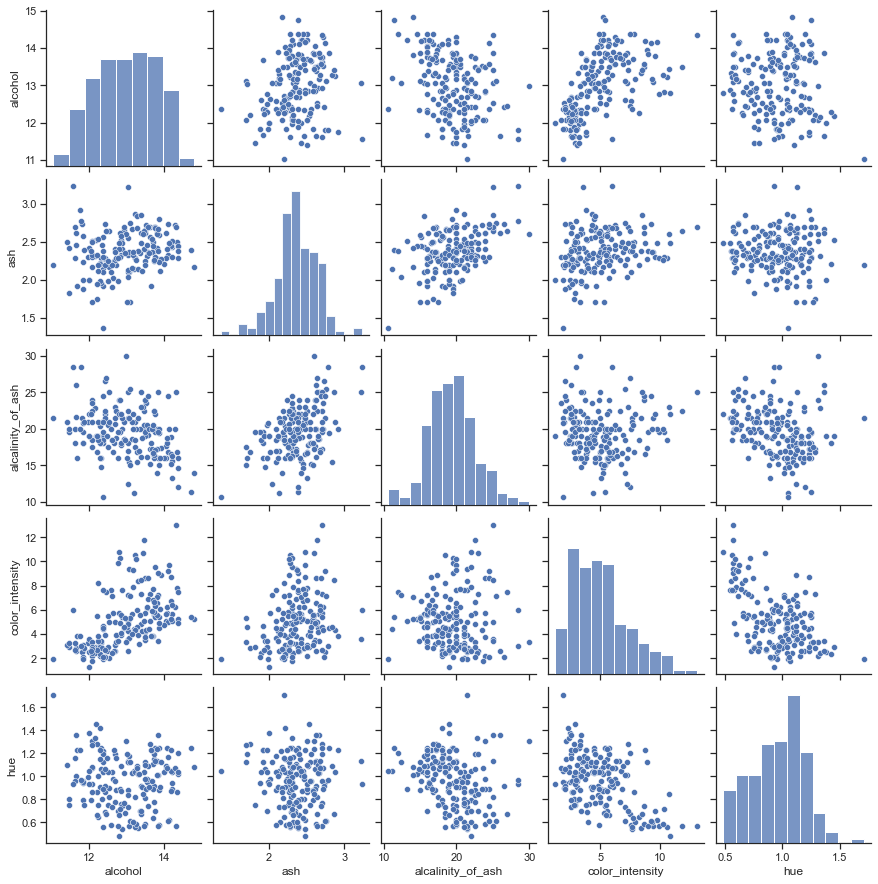

In [157]:
## EJECUTAR ESTE BLOQUE
 # Se importan las librerias a utilizar matplotlib, seaborn y pandas
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

wine = load_wine() # Se carga la base de datos dentro de la variable wine
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names']) # La data en formato numpy se transforma a un data frame
                                                                      # y se definen los nombres de las columnas.

data['target'] = wine['target']  # Se agrega una columna "target" al dataframe data que contiene los y_true
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind]) # Agrega una columna 'class' la cual es un mapeo
                                                                          # de la forma 0-> class_0, 1-> class_1 y 2:class_2 
                                                                          # desde 'target' a 'class'

g = sns.pairplot(data.iloc[:, [0,2,3,9,10]]) # En la diagonal hay histogramas, y en las posiciones distintas a la diagonal
                                             # son diagramas de dispersión asociados a la intersección entre el eje vertical
                                             # y horizontal de las carácteristicas: 
                                             # alcohol, ash, alcalinity_of_ash, color_intensity y hue
plt.show() # Se imprime el gráfico

**El gráfico muestra en la diagonal histogramas que representan la frecuencia de los valores que caen cierto rango y en las posiciones distintas a la diagonal hay diagramas de dispersión asociados a la intersección entre el eje vertical y horizontal de las carácteristicas: alcohol, ash, alcalinity_of_ash, color_intensity y hue.** 

**A partir de los gráficos, desde los historgramas se puede ver que la variable alcohol y alcalinity_of_ash distribuyen aproximadamente normal, y para los graficos de dispersión se observan que hay una pequeña correlación positiva entre las variables: alcohol y color_intensity, ash y alcalinity_of_ash, una correlación negativa entre las variables: hue y color_intensity y una casi nula correlación entre alcohol y hue.**

# Parte 2: Entrenar/testear clasificadores

En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas. 

## CLASIFICADOR 1

## Pregunta 2.1

Usando el siguiente código, complete lo que falta para entrenar el clasificador con los datos cargados (X, y) y hacer una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, muestre las métricas de **accuracy**, **precision**, **recall** y **f1-score**.

In [158]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()

X = wine.data      ## datos, caracteristicas o features 
y = wine.target    ## clase para cada instancia anterior

# .... COMPLETE ACA
clf.fit(X, y)

y_pred = clf.predict(X)   ## predecir 'y' usando la matriz 'X'

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## Pregunta 2.2

De acuerdo a las métricas obtenidas: 

1. ¿Qué opina sobre las predicciones? 
2. ¿Qué problema puede identificar?

1. **A partir de las métricas obtenidas se observa que las predicciones son perfectas, lo que es un indicador de que hay algo que no se está teniendo en cuenta.**
2. **El problema es que estamos evaluando el desempeño del clasificador sobre el mismo conjunto con el cual fue entrenado, por lo que no se puede asegurar su buen rendimiento con un dataset que no haya "visto" antes (es difícil sabe si el modelo es capaz de generalizar).**

## CLASIFICADOR 2

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 2.3

Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**

In [159]:
### Respuesta a pregunta 2.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
# Recuerde usar las variables X_train, X_test, y_train, y_test

In [160]:
clf = DecisionTreeClassifier(random_state=37)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.90      0.90        21
           2       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



## Pregunta 2.4

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta

1. **Según las métricas el segundo clasificador tiene peores resultados, esto es porque esta vez está clasificando datos nuevos. Si bien el primer clasificador tiene mejores métricas, esto es porque el modelo se sobreajustó a los datos de entrenamiento.**
2. **Preferimos la segunda forma ya que de este modo podemos evaluar su capacidad predictiva y de generalización.**

## Pregunta 2.5

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta 2.4. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa. **Verifique que su respuesta concuerde con lo que se imprime en la matriz (ya que los resultados pueden variar ligeramente si vuelve a entrenar el modelo).**

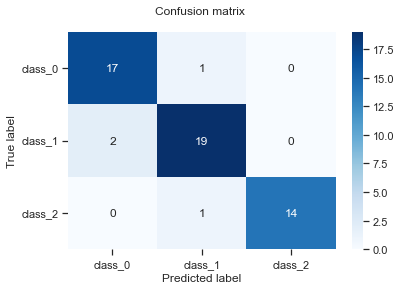

In [161]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = wine.target_names[unique_labels(y_test, y_pred)]

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

**En la diagonal de la matriz se observan las predicciones correctas y en las posiciones distintas a la diagonal se observan las predicciones incorrectas. Por ejemplo en la posición (class_1,class_0), se interpreta que hubieron dos instancias que fueron predichas como clase 0 cuando en realidad eran clase 1, análogamente, para la posición (class_2,class_1), hubo una instancia que se predijo como clase 1 cuando en realidad era clase 2 y en la posición (class_0,class_1) hubo una instancia que fue clasificada como clase 1 cuando en realidad era clase 0.**

## CLASIFICADOR 3

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [162]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold

Promedio Precision: 0.9003042328042328
Promedio Recall: 0.8763492063492064
Promedio F1-score: 0.8703155232566997
Promedio Accucary: 0.8705882352941178


## Pregunta 3.1

- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 2.4 y comente en qué difieren y por qué.

- ¿Qué beneficios tiene emplear cross-validation?

**Lo primero que se puede observar es que las métricas con cross-validation empeoran con respecto al hold-out. Estos difieren porque el modelo se evalua en 10 conjuntos de test distintos, siendo a su vez entrenado por 10 conjuntos de entrenamiento diferentes, lo cual genera distintas versiones del modelo que son evaluadas y finalmente promediadas a diferencia de la parte 2.4.**

**Los beneficios de emplear cross-validation es que se obtiene una métrica más confiable al probar el modelo varias veces. El cross-validation garantiza que los resultados son independientes de la partición de los datos.**